<a href="https://colab.research.google.com/github/elvirabelaandita/Erlvira-Bela-Andita/blob/main/UTS_ErlviraBelaAndita_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama_Erlvira Bela Andita NPM_220201052 UTS Pengolahan dan analisis citra digital

In [ ]:
# IMPORT LIBRARY
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os


In [ ]:
# Memanggil drive Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LOAD DATASET

imagePaths = '/content/drive/MyDrive/UTS/DatasetDaun'
label_list = ['Nangka', 'Daun Sirih']

data = []
labels = []

for label in label_list:
    image_dir = os.path.join(imagePaths, label, '*.jpg')
    print(f"Mengambil gambar dari: {image_dir}")
    for imagePath in glob.glob(image_dir):
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (224, 224))  # ukuran input MobileNetV2
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        data.append(image)
        labels.append(label)

Mengambil gambar dari: /content/drive/MyDrive/UTS/DatasetDaun/Nangka/*.jpg
Mengambil gambar dari: /content/drive/MyDrive/UTS/DatasetDaun/Daun Sirih/*.jpg


In [ ]:
# ubah list jadi array dan normalisasi
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
# melihat label
print(labels)

['Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka' 'Nangka'
 'Nangka' 'Nangka' 'Nangka' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih' 'Daun Sirih'
 'Daun Sirih' 'Daun Sirih' 'Daun 

In [ ]:
# preprocessing sesuai MobileNetV2
data = preprocess_input(data)

In [ ]:
# encoding label ke numerik
lb = LabelEncoder()
labels = lb.fit_transform(labels)

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# split data
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [ ]:
print("Ukuran data train =", x_train.shape)
print("Ukuran data test =", x_test.shape)

Ukuran data train = (81, 224, 224, 3)
Ukuran data test = (21, 224, 224, 3)


In [ ]:
# TRANSFER LEARNING > MOBILE NET V2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # freeze layer dasar agar efisien

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # binary classification
])

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# TRAINING SETUP
lr = 0.0001 # Model belajar secara lambat tapi stabil, mengurangi risiko “loncat” dari titik optimal.
epochs = 30 # Nilai epoch 30 berarti model melihat dataset 30 kali selama proses training.
batch_size = 16 # Ukuran moderat — efisien di komputer/laptop biasa tanpa GPU besar, dan memberikan pembelajaran yang stabil.

opt = Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
# augmentasi ringan untuk generalisasi lebih baik
datagen = ImageDataGenerator(
    rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2,
    shear_range=0.15, horizontal_flip=True, fill_mode="nearest"
)

H = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_size,
    epochs=epochs,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5621 - loss: 1.0517 - val_accuracy: 0.6667 - val_loss: 0.6698
Epoch 2/30
1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 557ms/step - accuracy: 0.5625 - loss: 0.6436

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step - accuracy: 0.5625 - loss: 0.6436 - val_accuracy: 0.6667 - val_loss: 0.6484
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 890ms/step - accuracy: 0.5092 - loss: 0.7692 - val_accuracy: 0.8571 - val_loss: 0.5622
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.3750 - loss: 0.9630 - val_accuracy: 0.8571 - val_loss: 0.5474
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step - accuracy: 0.5594 - loss: 0.6710 - val_accuracy: 0.9048 - val_loss: 0.4852
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 364ms/step - accuracy: 0.6250 - loss: 0.7606 - val_accuracy: 0.9048 - val_loss: 0.4774
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 977ms/step - accuracy: 0.7035 - loss: 0.6692 - val_accuracy: 0.9048 - val_loss: 0.4154
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.5000 - loss: 0.7823 - val_accuracy: 0.9048 - val_loss: 0.4005
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 904ms/step - accuracy: 0.7394 - loss: 0.5776 - val_accuracy: 0.9524 - val_loss: 0.3443
Epo

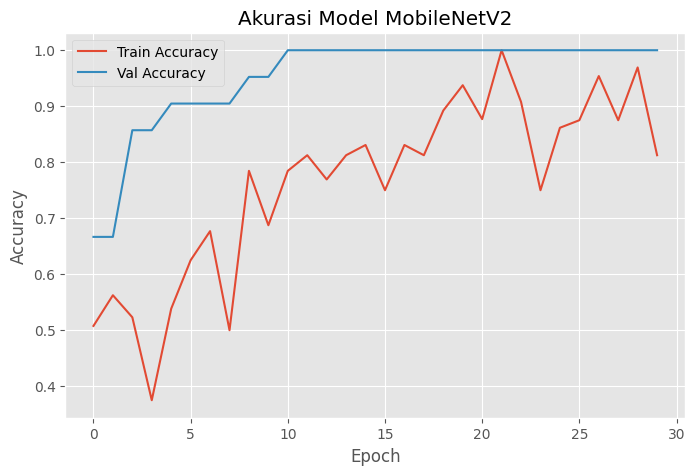

In [ ]:
# VISUALISASI AKURASI

N = np.arange(0, epochs)
plt.style.use("ggplot")
plt.figure(figsize=(8, 5))
plt.plot(N, H.history["accuracy"], label="Train Accuracy")
plt.plot(N, H.history["val_accuracy"], label="Val Accuracy")
plt.title("Akurasi Model MobileNetV2")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# EVALUASI MODEL

predictions = model.predict(x_test, batch_size=batch_size)
target = (predictions > 0.5).astype(int)
print("Classification Report:")
print(classification_report(y_test, target, target_names=label_list))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
Classification Report:
              precision    recall  f1-score   support

      Nangka       1.00      1.00      1.00         8
  Daun Sirih       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [ ]:
# UJI MODEL DENGAN CITRA BARU
def predict_image(image_path):
    image = cv2.imread(image_path)
    output = image.copy()
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)

    pred = model.predict(image)
    label = "Nangka" if pred > 0.5 else "Daun Sirih"
    cv2.putText(output, f"Hasil Prediksi : {label}", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Resize hasil output agar tampil kecil
    output = cv2.resize(output, (800, 800))

    from google.colab.patches import cv2_imshow
    cv2_imshow(output)
    print("Prediksi :", label)


Uji gambar Daun Sirih:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


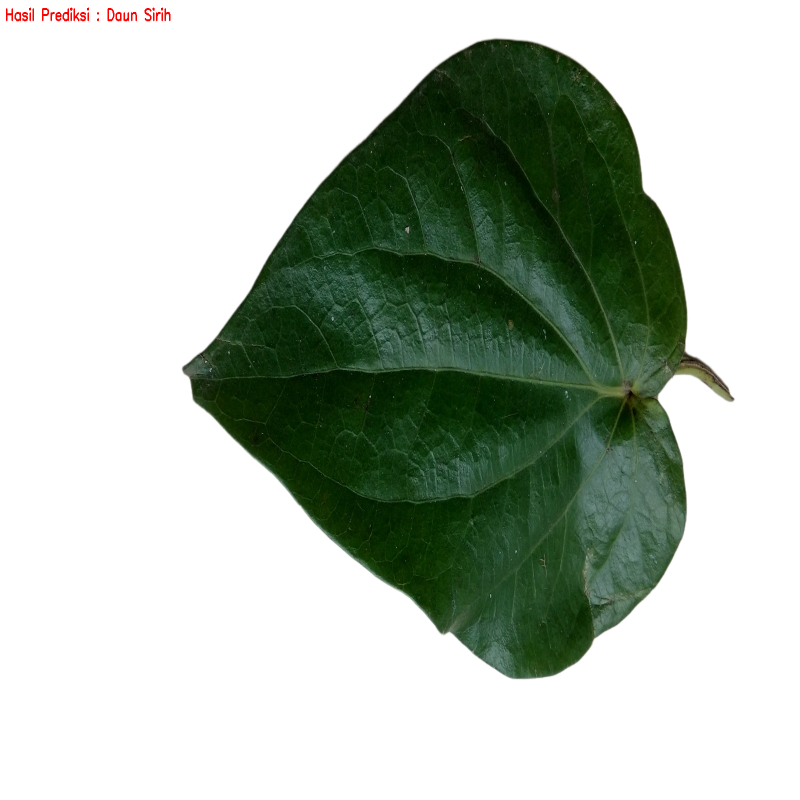

Prediksi : Daun Sirih

Uji gambar Nangka:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


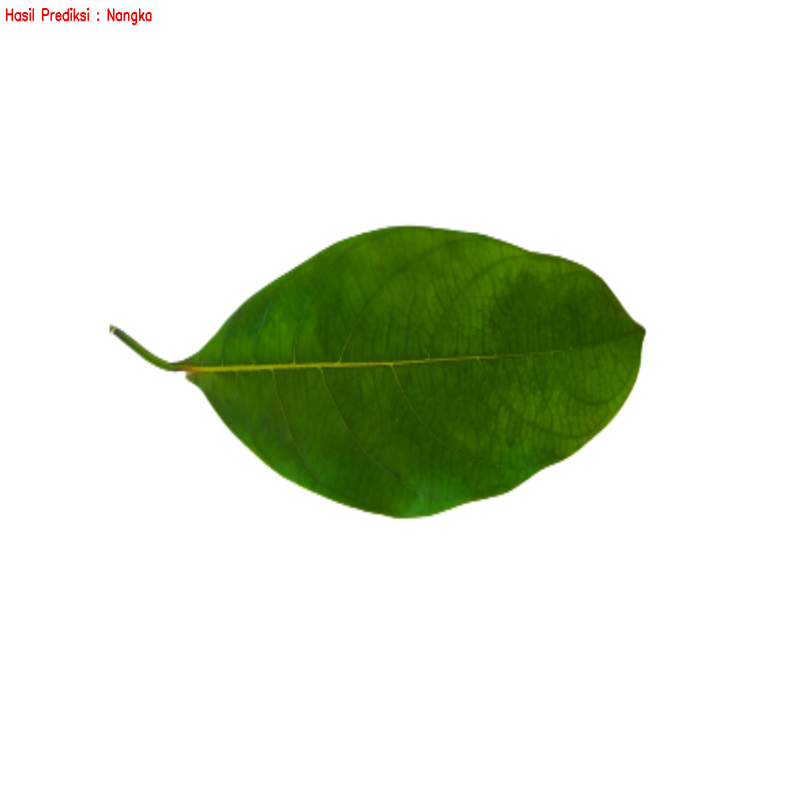

Prediksi : Nangka


In [ ]:
# contoh uji
print("Uji gambar Daun Sirih:")
predict_image(os.path.join(imagePaths, 'Daun Sirih', '023.jpg')) # Ganti dengan foto daun yang akan di Prediksi

print("\nUji gambar Nangka:")
predict_image(os.path.join(imagePaths, 'Nangka', '023.jpg')) # Ganti dengan foto daun yang akan di Prediksi

In [ ]:
model.save('image_classification.h5')
print("Model berhasil disimpan.")

Model berhasil disimpan.
